In [1]:
import os

os.chdir("/home/unix/SmartBinAnalysis/Deliverables")

Loaded Containers -- > Creating
Created Containers -- > Processing Metrics
Processed 1 of 801 containers
Processed 41 of 801 containers
Processed 81 of 801 containers
Processed 121 of 801 containers
Processed 161 of 801 containers
Processed 201 of 801 containers
Processed 241 of 801 containers
Processed 281 of 801 containers
Processed 321 of 801 containers
Processed 361 of 801 containers
Processed 401 of 801 containers
Processed 441 of 801 containers
Processed 481 of 801 containers
Processed 521 of 801 containers
Processed 561 of 801 containers
Processed 601 of 801 containers
Processed 641 of 801 containers
Processed 681 of 801 containers
Processed 721 of 801 containers
Processed 761 of 801 containers
Processed 801 of 801 containers
Processed


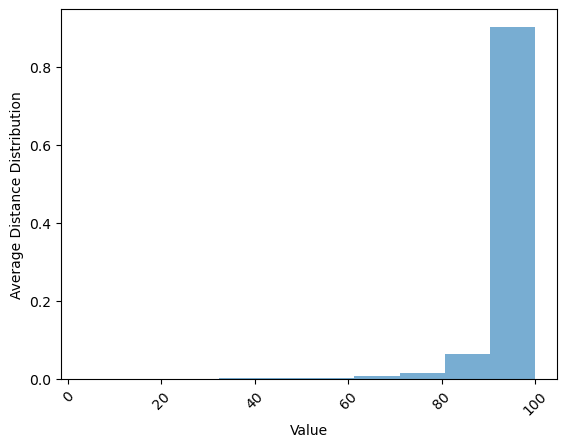

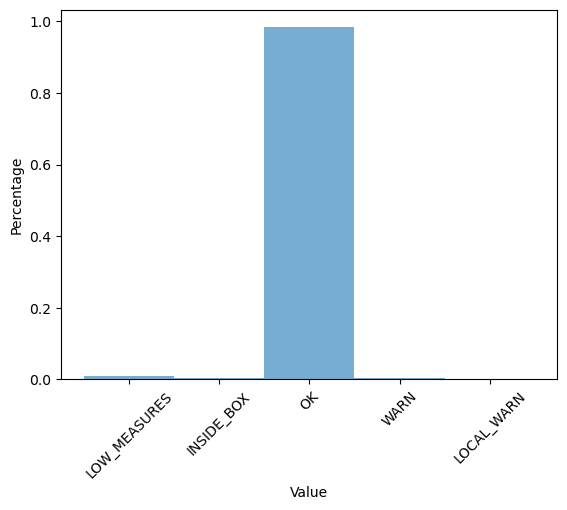

In [2]:
import extract as e
import transform as t
import save_load as sl
from Container import Container


PATH = "/home/unix/SmartData/"
FILEs = 'Enchimentos_de_sensores[RioMaior].csv'
FILEd = 'Enchimentos_com_Recolhas[RioMaior].csv'


fill_df, rec_df = e.import_same_file(FILEd,
                                    collect_id_header = "idrecolha",
                                    sep               = ';', 
                                    path              = PATH, 
                                    print_first_line  = False)

fill, collect, info = e.pre_process_data(
                                    df_fill             = fill_df, 
                                    df_collection       = rec_df,
                                    id_header_fill      = "idcontentor",
                                    date_header_fill    = "Data da leitura",
                                    date_format_fill    = "%Y-%m-%d %H:%M:%S.%f",
                                    fill_header_fill    = "Enchimento",
                                    id_header_collect   = "idcontentor",
                                    date_header_collect = "Data da leitura",
                                    date_format_collect = "%Y-%m-%d %H:%M:%S.%f",
                                )

print("Loaded Containers -- > Creating")

container_dict, ids = e.container_global_sorted_wrapper(fill,collect, info)

print("Created Containers -- > Processing Metrics")

t.pre_process_container_metrics(container_dict, calc_spearman=False)

print("Processed")

t.view_metrics(container_dict, box_window=7, mv_thresh = 70, min_days = 30, use = 'avg_dist')

# step = len(container_dict)//20
# thresh = 0
# i = 0

# print("Fixing Containers")

# container:Container
# for id, container in container_dict.items():
#     _, _, container_dict[id] = t.fix_collections_sensor(
#                                                         container,
#                                                         box_window   = 7,
#                                                         mv_thresh    = 50,
#                                                         min_days     = 30,
#                                                         max_fill     = 24,
#                                                         dist_thresh  = 70,
#                                                         c_trash      = 24,
#                                                         var_thresh   = 0.01,
#                                                         spear_thresh = 60,
#                                                         use          = "spear")
#     i+= 1
#     if(i > thresh):
#         print( f"Processed {i} of {len(container_dict)} containers")
#         thresh += step

# t.view_metrics(container_dict, box_window=7, mv_thresh = 50, min_days = 30, use = 'spear')

In [3]:
PATH = "home/unix/SmartDrivers2024"

container:Container
for id, container in container_dict.items():
    sl.save_container_structured(id, container, path=PATH, ver="_Data_with_metrics")

OK_Containers = t.filter_containers(containers_dict=container_dict)

container:Container
for id , container in OK_Containers.items():
    sl.save_rate_series(id=id, container=container, rate_type='mean', freq='1D', path=PATH) 

ids = list(OK_Containers.keys())

sl.save_id_containers(ids, path=PATH, name = "Rate_Ids")